# Welcome to WiDS@UBC's DSCI100 Study Social and Midterm Review!

The goal of this notebook is to help you review some coding concepts for your DSCI100 exam. We're going to work on the dataset `iris`, which is a dataset included in base R.

In [1]:
## Run this cell before continuing!

library(tidyverse)
data(iris)
glimpse(iris)
head(iris)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Rows: 150
Columns: 5
$ Sepal.Length <dbl> 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.…
$ Sepal.Width  <dbl> 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.…
$ Petal.Length <dbl> 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.…
$ Petal.Width  <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.…
$ Species      <fct> setosa, setosa, setosa, setosa, setosa, setosa, setosa, s…


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


This dataset contains four variables, which describe measurements of two different parts of three different species of iris.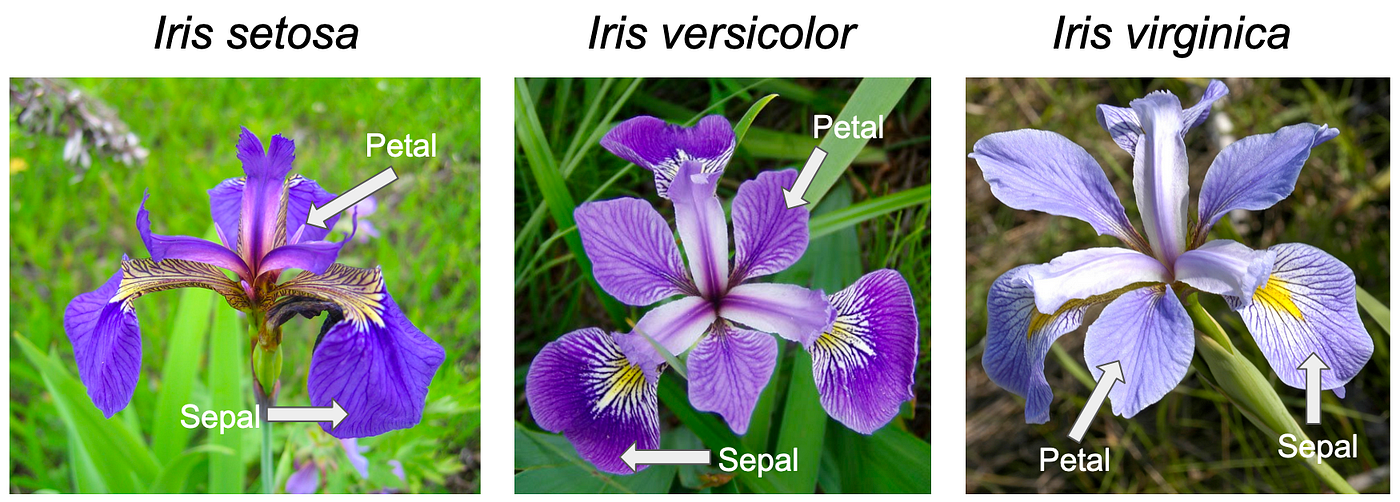

### Defining the Question
Before we touch the data, we must understand the type of questions we could be answering.

#### Exercise 1: Question Classification 
*Match the following questions about the iris dataset to their type (Descriptive, Exploratory, Predictive, Inferential, Causal, Mechanistic):*

"What is the average petal length for each species in this specific dataset?"

"Can we use sepal width to predict which species a flower belongs to?"

"If we increase the nitrogen in the soil, will it cause the petals to grow longer?"

"Is there a correlation between sepal length and petal length that suggests a hypothesis?"

```Answers: 1. Descriptive, 2. Predictive, 3. Causal, 4. Exploratory.```

#### Exercise 2: Filtering, Selecting, and Mutating

Using the `iris` dataset and the `tidyverse`package, complete the four following steps.

1. Filter for rows where `Species` is "virginica" and `Sepal.Length` is greater than 6

2. Select only the `Sepal.Length`, `Sepal.Width`, and `Species` columns.

3. Create a new column called `Sepal.Area`, which is found by calculatibg ($Length \times Width$).

4. Arrange the results by `Sepal.Area` in descending order, and return the 3 rows with the smallest area.

Assign your work to an object called `iris_wrangled`

In [38]:

iris_wrangled <- iris |>
  filter(Species == "virginica", Sepal.Length > 6) |>
  select(Sepal.Length, Sepal.Width, Species) |>
  mutate(Sepal.Area = Sepal.Length * Sepal.Width) |>
  arrange(desc(Sepal.Area)) |>
  slice(1:3)

iris_wrangled

Sepal.Length,Sepal.Width,Species,Sepal.Area
<dbl>,<dbl>,<fct>,<dbl>
7.9,3.8,virginica,30.02
7.7,3.8,virginica,29.26
7.2,3.6,virginica,25.92


#### Exercise 3: Group by and Summarize
Find the mean sepal length for each different species of iris. Assign your answer to an object called `mean_sepal_length`.

In [39]:

mean_sepal_length <- iris |>
  group_by(Species) |>
  summarize(mean_sepal_length = mean(Sepal.Length))

mean_sepal_length

Species,mean_sepal_length
<fct>,<dbl>
setosa,5.006
versicolor,5.936
virginica,6.588


#### Exercise 4: Visualization!
Create a scatter plot of `Petal.Length` (x) vs `Petal.Width` (y). Color the points by Species. Use human-readable labels and give your plot a title. Assign your answer to an object called `iris_scatter`.

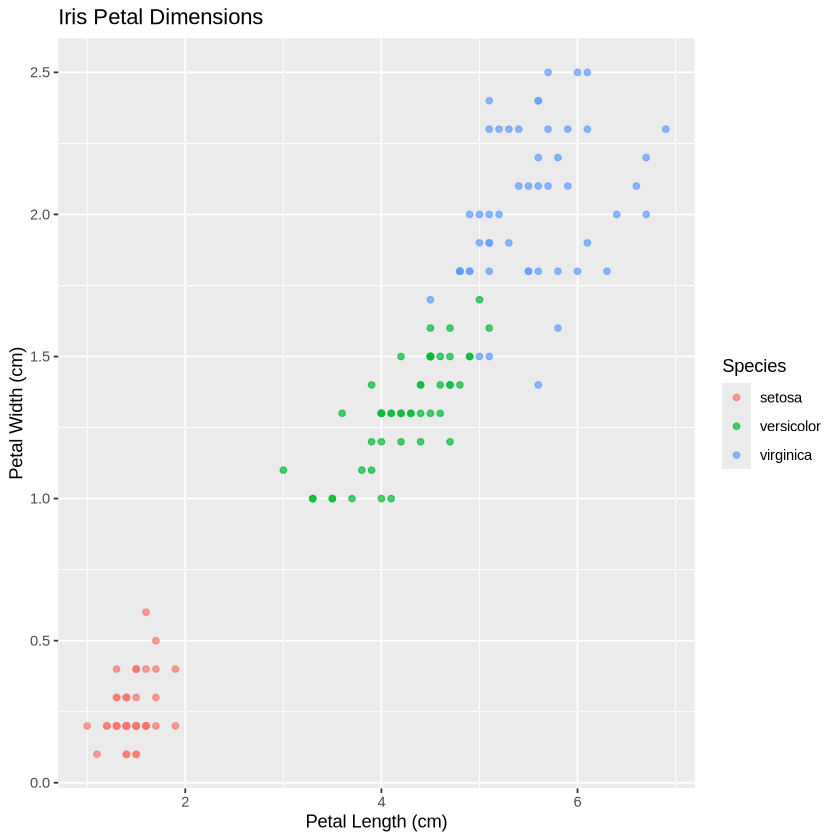

In [40]:
iris_scatter <- ggplot(iris, aes(x = Petal.Length, y = Petal.Width, color = Species)) +
  geom_point(alpha = 0.7) +
  labs(title = "Iris Petal Dimensions",
       x = "Petal Length (cm)",
       y = "Petal Width (cm)") 

iris_scatter

Wow, don't those look like clear clusters to you? 

#### Exercise 5: Classification

Last week, I went walking in a field of irises and I found a new and very pretty one. I measured its petals and I'm now wondering what its species is. *This is a classification problem*. Using a K-NN Algorithim, help me predict the species of `new_iris` using the predictors of `Petal.Length` and `Petal.Width` and 3 neighbours.

In [41]:

new_iris <- tibble(Petal.Width = 2,
                  Petal.Length = 6)

library(tidymodels)


knn_spec_iris <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
                set_engine("kknn") |>
                set_mode("classification")


knn_recipe_iris <- recipe(Species ~ Petal.Width + Petal.Length, data = iris) |>
                    step_center(all_predictors()) |>
                    step_scale(all_predictors())


knn_fit_iris <- workflow() |>
                add_model(knn_spec_iris) |>
                add_recipe(knn_recipe_iris) |>
                fit(data = iris)


predict(knn_fit_iris, new_iris)

.pred_class
<fct>
virginica


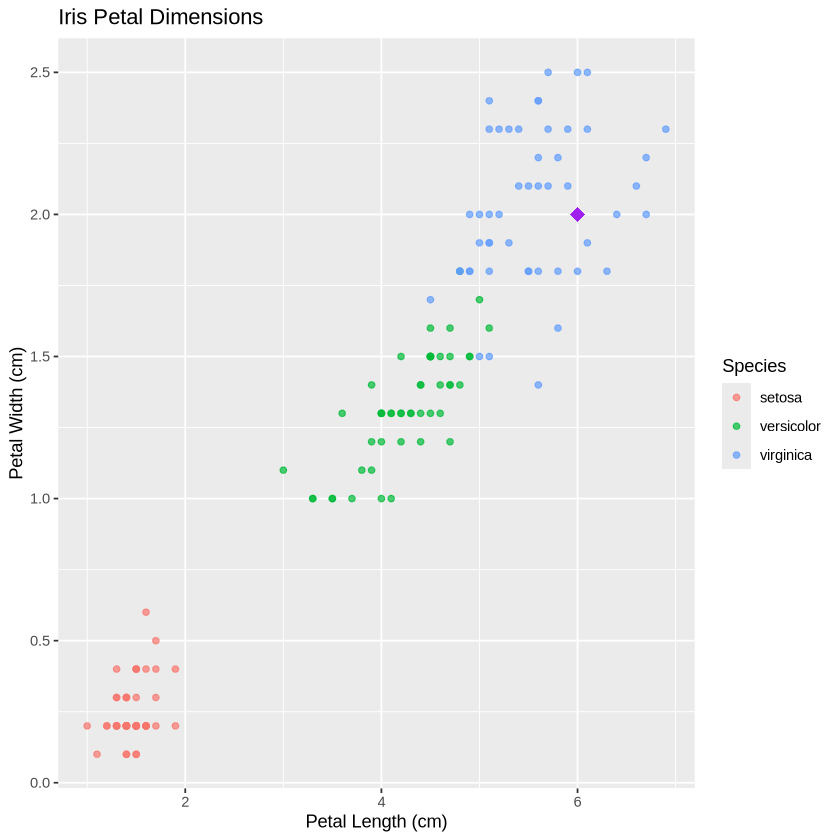

In [42]:
#Run this cell to see where my new iris falls on the graph

iris_scatter <- ggplot(iris, aes(x = Petal.Length, y = Petal.Width, color = Species)) +
  geom_point(alpha = 0.7) +
  labs(title = "Iris Petal Dimensions",
       x = "Petal Length (cm)",
       y = "Petal Width (cm)") +
  annotate("point", x = 6, y = 2, color = "purple", size = 4, shape = 18)

iris_scatter

#### Exercise 6: Understanding version control

Define the following Git Commands. Commit, Stage/Add, Push, Pull.

What's the difference between Git and Github?

```

Commit:
Creates a saved snapshot of your project at a specific point in time.
This lets you go back to previous versions if something breaks.

Stage / Add:
Selects which file changes will be included in the next commit.
It prepares your changes to be saved.

Push:
Sends your committed changes from your computer to a remote repository like GitHub.
This updates the shared version of the project.

Pull:
Downloads changes from the remote repository to your local computer.
It also merges those changes into your current work.

Difference between Git and GitHub:
Git is a version control tool that runs on your computer and tracks changes to files.
GitHub is an online service that hosts Git repositories and helps people collaborate.
```